In [ ]:
import tensorflow as tf
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=b9d4c946ce6f8bf6e91fabffff9f155841211a9f25004f2da23916fa20a03e33
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
wget.download(link)


ModuleNotFoundError: ignored

In [ ]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode = "rb") as f:
  train = pickle.load(f)

In [ ]:
with open(valid_link,mode = "rb") as f:
  valid = pickle.load(f)

In [ ]:
with open(test_link, mode = "rb") as f:
  test = pickle.load(f)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
trainX = train["features"]
trainY = train["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
trainX[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt


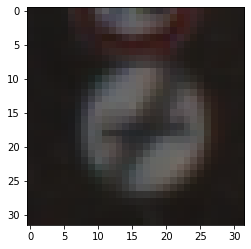

In [ ]:
plt.imshow(trainX[0])

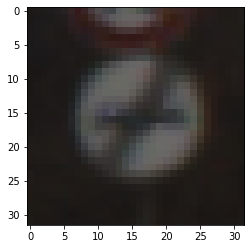

In [ ]:
plt.imshow(trainX[2])

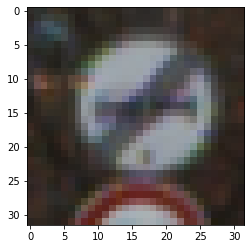

In [ ]:
plt.imshow(trainX[69])

In [ ]:
trainY[69]

41

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [ ]:
classNames[trainY[69]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(trainX, trainY)

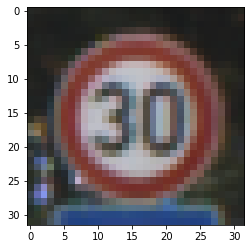

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames[trainY[0]]

'Speed limit (30km/h)'

In [ ]:
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

In [ ]:
train = trainX.astype("float") / 255.0

chuẩn hóa dữ liệu train

In [ ]:
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

chuẩn hóa dữ liệu validation và test


In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)

In [ ]:
validY = lb.fit_transform(validY)

In [ ]:
valid["labels"][0]

41

In [ ]:
 validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

import các thư viện cần thiết cho việc xây dựng mạng Neural Network

In [ ]:
model = Sequential()

In [ ]:
width = 32
height = 32
classes = 43
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding ="same", input_shape = shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3, 3), padding ="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(Conv2D(64, (3, 3), padding = "same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding = "same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

tất cả những lớp xử lí features như Convolution, những lớp nhận diện class như Dense, Softmax đều không có giá trị Parameters và phải thông qua quá trình train để có thể học được những Parameters đó.

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip= True)

**TĂNG CƯỜNG ẢNH**
Vì thực tế ảnh đầu vào không phải lúc nào cũng nằm yên 1 vị trí (có thể xiên, dọc, chéo, vuông góc), vì thế để model chúng ta có thể học được dù ảnh có thay đổi như nào thì nó vẫn là 1 đối tượng => chúng ta phải tăng cường ảnh.

In [ ]:
learning_rate = 0.01

**TỐC ĐỘ HỌC**
Chính là tốc độ của viên bi chạy xuống đáy dốc trong mặt phẳng Error rate, nếu learning_rate quá cao thì CÓ KHẢ NĂNG viên bi khi đi qua điểm cực tiểu, viên bi có thể lăn qua vị trí khác mà không thể dừng lại tại vị trí cực tiểu mình mong muốn, còn nếu learning_rate quá chậm, chúng ta sẽ mất rất nhiều thời gian để có thể đến vị trí cực tiểu cần tìm.

In [ ]:
epochs = 10
#epoch
#steps
batch_size = 64

### **Epoch và Batch**
>Epoch: là số lần chúng ta cho TOÀN BỘ dữ liệu TRAIN chạy qua model, ví dụ epoch ở đây tôi cho là 10, thì có nghĩa model chúng ta sẽ gặp 10 lần TOÀN BỘ dữ liệu TRAIN.
Batch:
Ví dụ 1 Epoch chứa 100 000 dữ liệu, chúng ta không thể cho cả 100 000 dữ liệu chạy qua model trong 1 LẦN duy nhất, RAM chúng ta không thể làm được việc đó. Vì thế, chúng ta sẽ chia 1 epoch thành nhiều step, mỗi step chúng ta cho 1 batch_size nhất định, với ví dụ trên, chúng ta sẽ chia epoch này thành 100 step, mỗi step chứa 1000 batch_size, nghĩa là chúng ta sẽ để cho RAM xử lí 1000 dữ liệu mỗi lần, làm lần lượt 100 lần cho đến khi hết epoch.

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum= 0.9)

TỐI ƯU HÓA LOSS FUNCTION
>>Momentum là gì: tạo cho viên bi 1 quán tính để viên bi có thể vượt qua các sườn dốc và tìm đến điểm Global Minimum (cực tiểu toàn cục)

In [ ]:
model.compile(optimizer= opt, loss = "categorical_crossentropy", metrics= ["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size = batch_size), validation_data = (validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
543/543 [==============================] - 49s 33ms/step - loss: 2.0711 - accuracy: 0.4060 - val_loss: 6.3536 - val_accuracy: 0.0136
Epoch 2/10
543/543 [==============================] - 17s 32ms/step - loss: 0.7768 - accuracy: 0.7475 - val_loss: 6.8279 - val_accuracy: 0.0136
Epoch 3/10
543/543 [==============================] - 17s 32ms/step - loss: 0.3570 - accuracy: 0.8851 - val_loss: 6.0506 - val_accuracy: 0.0068
Epoch 4/10
543/543 [==============================] - 17s 32ms/step - loss: 0.2170 - accuracy: 0.9292 - val_loss: 8.5147 - val_accuracy: 0.0068
Epoch 5/10
543/543 [==============================] - 17s 32ms/step - loss: 0.1489 - accuracy: 0.9514 - val_loss: 8.3571 - val_accuracy: 0.0068
Epoch 6/10
543/543 [==============================] - 17s 32ms/step - loss: 0.1153 - accuracy: 0.9630 - val_loss: 9.7056 - val_accuracy: 0.0068
Epoch 7/10
543/543 [==============================] - 17s 32ms/step - loss: 0.0880 - accuracy: 0.9720 - val_loss: 11.5501 - val_accuracy

In [ ]:
model.save("quynhanh.h5")

Lưu model đã train về Drive

In [ ]:
saved_model = tf.keras.models.load_model("TrainedModel.h5")

In [ ]:
result = saved_model.predict(testX[80:81])

In [ ]:
result

array([[7.35700212e-09, 3.47551155e-10, 2.39520386e-08, 1.88581595e-09,
        1.33302738e-08, 2.34816071e-07, 2.05922476e-07, 4.23535448e-06,
        2.28239699e-07, 4.61075160e-06, 2.03367323e-04, 1.04312915e-02,
        2.06262985e-06, 2.95029679e-07, 9.20023098e-08, 2.56762922e-09,
        1.20297002e-04, 2.06340028e-05, 6.09199051e-05, 1.86213944e-02,
        8.75735376e-03, 9.14503098e-01, 1.50626727e-06, 3.24367918e-02,
        6.30569659e-08, 3.35117802e-05, 3.29985842e-03, 1.60968490e-03,
        1.53842175e-05, 1.18893217e-06, 1.22932100e-03, 8.63643270e-03,
        1.98340274e-07, 5.05318098e-08, 1.04557955e-07, 6.65361322e-09,
        6.52085532e-08, 1.95794587e-06, 7.05046716e-07, 8.83703279e-08,
        6.83514372e-07, 5.84478883e-08, 1.91375784e-06]], dtype=float32)

In [ ]:
import numpy as np


In [ ]:
final = np.argmax(result)

In [ ]:
final = classNames[final]

In [ ]:
final

'Double curve'

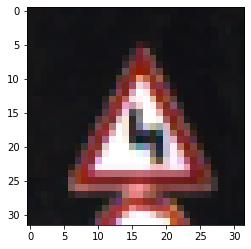

In [ ]:
plt.imshow(test["features"][80])

do testX đã được chuẩn hóa, nên chúng ta phải sử dụng test để tìm được ảnh gốc.